#  Arima (ARIMA)

## Importing Necessary Modules

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

## Importing and Processing Data

In [56]:
df = pd.read_csv('old_working.csv')
df

,Time,Price
0,2021-03-27,0.1425
1,2021-03-28,0.1445
2,2021-03-29,0.1456
3,2021-03-30,0.1519
4,2021-03-31,0.1526
...,...,...
85,2021-06-20,0.1683
86,2021-06-21,0.1688
87,2021-06-22,0.1693
88,2021-06-23,0.1689


In [57]:
df.describe()

,Price
count,90.000000
mean,0.155623
std,0.007094
min,0.142500
25%,0.151200
50%,0.154000
75%,0.162325
max,0.169300


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    90 non-null     object 
 1   Price   90 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [59]:
df['Time'] = pd.to_datetime(df.Time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    90 non-null     datetime64[ns]
 1   Price   90 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 KB


In [60]:
df.head()

,Time,Price
0,2021-03-27,0.1425
1,2021-03-28,0.1445
2,2021-03-29,0.1456
3,2021-03-30,0.1519
4,2021-03-31,0.1526


In [61]:
df.set_index('Time', inplace=True)

In [62]:
df.head()

,Price
Time,
2021-03-27,0.1425
2021-03-28,0.1445
2021-03-29,0.1456
2021-03-30,0.1519
2021-03-31,0.1526


## Visualising Data

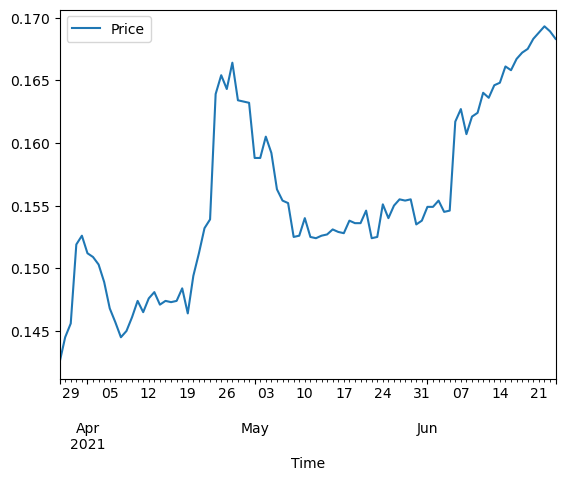

In [63]:
df.plot()
plt.show()

## Checking Stationarity

In [64]:
from pmdarima.arima import ADFTest

In [65]:
adf_test = ADFTest(alpha=0.05)
print(adf_test)
adf_test.should_diff(df)

ADFTest()


(0.34508068314245954, True)

## Train and Test Split

In [66]:
n = int(len(df) * 0.8)

In [67]:
train = df.Price[:n]
test = df.Price[n:]
print(f"For Training\n{train}\n")
print(f"For Testing\n{test}")

For Training
Time
2021-03-27    0.1425
2021-03-28    0.1445
2021-03-29    0.1456
2021-03-30    0.1519
2021-03-31    0.1526
               ...  
2021-06-02    0.1549
2021-06-03    0.1554
2021-06-04    0.1545
2021-06-05    0.1546
2021-06-06    0.1617
Name: Price, Length: 72, dtype: float64

For Testing
Time
2021-06-07    0.1627
2021-06-08    0.1607
2021-06-09    0.1621
2021-06-10    0.1624
2021-06-11    0.1640
2021-06-12    0.1636
2021-06-13    0.1646
2021-06-14    0.1648
2021-06-15    0.1661
2021-06-16    0.1658
2021-06-17    0.1667
2021-06-18    0.1672
2021-06-19    0.1675
2021-06-20    0.1683
2021-06-21    0.1688
2021-06-22    0.1693
2021-06-23    0.1689
2021-06-24    0.1683
Name: Price, dtype: float64


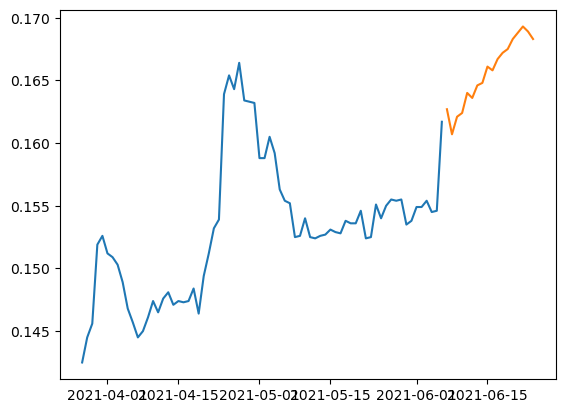

In [68]:
plt.plot(train)
plt.plot(test)
plt.show()

## Arima Model

In [72]:
arima_model=auto_arima (train, start_p=3, d=1, start_q=3, max_p=3,
                        max_d=1, max_q=3, start_P=0, D=1, start_Q=0,
                        max_P=5, max_D=5, max_Q=5, m=4, seasonal=False,
                        error_action='warn', trace = True, 
                        supress_warnings=True, stepwise = True, 
                        random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-665.344, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-669.704, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-668.375, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-668.401, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-670.543, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-666.420, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.141 seconds


/Users/tej/anaconda3/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


## Forecasting

In [73]:
prediction = pd.DataFrame(arima_model.predict(n_periods=18), 
                          index=test.index)
prediction_columns = ['predicted_price']
prediction

,0
Time,
2021-06-07,0.1617
2021-06-08,0.1617
2021-06-09,0.1617
2021-06-10,0.1617
2021-06-11,0.1617
2021-06-12,0.1617
2021-06-13,0.1617
2021-06-14,0.1617
2021-06-15,0.1617


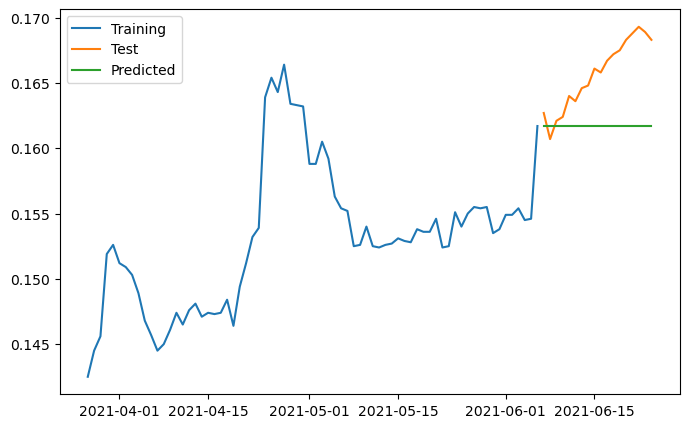

In [74]:
plt.figure(figsize=(8, 5))
plt.plot(train, label="Training")
plt.plot(test, label='Test')
plt.plot(prediction, label="Predicted")
plt.legend(loc="upper left")
plt.show()

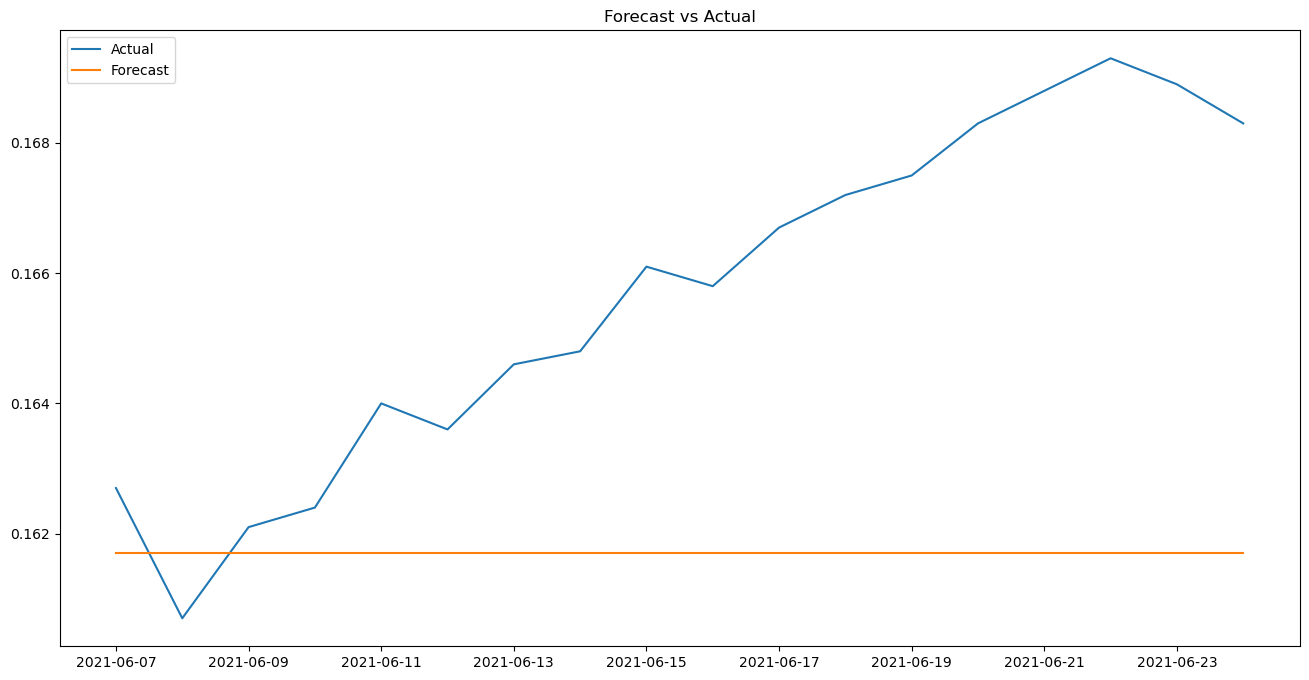

In [75]:
step = 18

# fc = pd.Series(fc, index=test[:step].index)
# print(fc)
plt.figure(figsize=(16, 8))

plt.plot(test[:step], label="Actual")

plt.plot(prediction, label="Forecast")

plt.title("Forecast vs Actual")
plt.legend(loc="upper left")
plt.show()

## R2 Score

In [76]:
test_df = pd.DataFrame(test)
test_df
# test['predicted_prices'] = prediction

,Price
Time,
2021-06-07,0.1627
2021-06-08,0.1607
2021-06-09,0.1621
2021-06-10,0.1624
2021-06-11,0.1640
2021-06-12,0.1636
2021-06-13,0.1646
2021-06-14,0.1648
2021-06-15,0.1661


In [77]:
test_df['predicted_prices'] = prediction
test_df = test_df.dropna()
test_df

,Price,predicted_prices
Time,,
2021-06-07,0.1627,0.1617
2021-06-08,0.1607,0.1617
2021-06-09,0.1621,0.1617
2021-06-10,0.1624,0.1617
2021-06-11,0.1640,0.1617
2021-06-12,0.1636,0.1617
2021-06-13,0.1646,0.1617
2021-06-14,0.1648,0.1617
2021-06-15,0.1661,0.1617


In [78]:
r2_score(test_df['Price'], test_df['predicted_prices'])

-2.344531596862486

In [79]:
np.sqrt(mean_squared_error(test_df['Price'], test_df['predicted_prices']))

0.004724404724407076

In [80]:
test_df.predicted_prices.describe()

count    1.800000e+01
mean     1.617000e-01
std      2.856025e-17
min      1.617000e-01
25%      1.617000e-01
50%      1.617000e-01
75%      1.617000e-01
max      1.617000e-01
Name: predicted_prices, dtype: float64

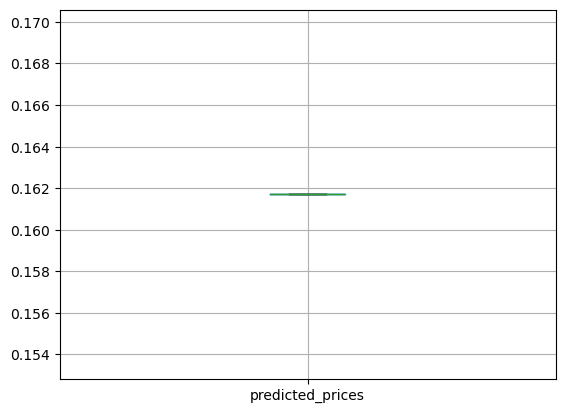

In [81]:
test_df.boxplot(column=['predicted_prices'])
plt.show()